# DengAI: Predicting Disease Spread
Your goal is to predict the total_cases label for each (city, year, weekofyear) in the test set. There are two cities, San Juan and Iquitos, with test data for each city spanning 5 and 3 years respectively. 

The data for each city have been concatenated along with a city column indicating the source: sj for San Juan and iq for Iquitos. The test set is a pure future hold-out, meaning the test data are sequential and non-overlapping with any of the training data. 

In [1]:
library(ggplot2)
library(plotly)
library(usdm)
library(corrplot)
library(zoo)

Warning message:
"package 'plotly' was built under R version 3.4.4"
Attaching package: 'plotly'

The following object is masked from 'package:ggplot2':

    last_plot

The following object is masked from 'package:stats':

    filter

The following object is masked from 'package:graphics':

    layout

Warning message:
"package 'usdm' was built under R version 3.4.4"Loading required package: sp
Warning message:
"package 'sp' was built under R version 3.4.4"Loading required package: raster
Warning message:
"package 'raster' was built under R version 3.4.4"
Attaching package: 'raster'

The following object is masked from 'package:plotly':

    select

corrplot 0.84 loaded

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric



In [2]:
# install.packages("usdm",repos = 'http://cran.us.r-project.org')

In [3]:
train = read.csv("C:/Users/RAA090/Documents/Personal/data_sets/DengAI Predicting Disease Spread/dengue_features_train.csv")
train_label = read.csv("C:/Users/RAA090/Documents/Personal/data_sets/DengAI Predicting Disease Spread/dengue_labels_train.csv")
test = read.csv("C:/Users/RAA090/Documents/Personal/data_sets/DengAI Predicting Disease Spread/dengue_features_test.csv")

In [4]:
head(train)

city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
sj,1990,18,1990-04-30,0.1226000,0.1037250,0.1984833,0.1776167,12.42,297.5729,...,32.00,73.36571,12.42,14.01286,2.628571,25.44286,6.900000,29.4,20.0,16.0
sj,1990,19,1990-05-07,0.1699000,0.1421750,0.1623571,0.1554857,22.82,298.2114,...,17.94,77.36857,22.82,15.37286,2.371429,26.71429,6.371429,31.7,22.2,8.6
sj,1990,20,1990-05-14,0.0322500,0.1729667,0.1572000,0.1708429,34.54,298.7814,...,26.10,82.05286,34.54,16.84857,2.300000,26.71429,6.485714,32.2,22.8,41.4
sj,1990,21,1990-05-21,0.1286333,0.2450667,0.2275571,0.2358857,15.36,298.9871,...,13.90,80.33714,15.36,16.67286,2.428571,27.47143,6.771429,33.3,23.3,4.0
sj,1990,22,1990-05-28,0.1962000,0.2622000,0.2512000,0.2473400,7.52,299.5186,...,12.20,80.46000,7.52,17.21000,3.014286,28.94286,9.371429,35.0,23.9,5.8
sj,1990,23,1990-06-04,NA,0.1748500,0.2543143,0.1817429,9.58,299.6300,...,26.49,79.89143,9.58,17.21286,2.100000,28.11429,6.942857,34.4,23.9,39.1


In [5]:
dim(train)

[1] 1456   24

In [6]:
head(train_label)

city,year,weekofyear,total_cases
sj,1990,18,4
sj,1990,19,5
sj,1990,20,4
sj,1990,21,3
sj,1990,22,6
sj,1990,23,2


In [7]:
dim(train_label)

[1] 1456    4

In [8]:
head(test)

city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
sj,2008,18,2008-04-29,-0.0189,-0.01890000,0.10272860,0.09120000,78.60,298.4929,...,25.37,78.78143,78.60,15.91857,3.128571,26.52857,7.057143,33.3,21.7,75.2
sj,2008,19,2008-05-06,-0.0180,-0.01240000,0.08204286,0.07231429,12.56,298.4757,...,21.83,78.23000,12.56,15.79143,2.571429,26.07143,5.557143,30.0,22.2,34.3
sj,2008,20,2008-05-13,-0.0015,NA,0.15108330,0.09152857,3.66,299.4557,...,4.12,78.27000,3.66,16.67429,4.428571,27.92857,7.785714,32.8,22.8,3.0
sj,2008,21,2008-05-20,NA,-0.01986667,0.12432860,0.12568570,0.00,299.6900,...,2.20,73.01571,0.00,15.77571,4.342857,28.05714,6.271429,33.3,24.4,0.3
sj,2008,22,2008-05-27,0.0568,0.03983333,0.06226667,0.07591429,0.76,299.7800,...,4.36,74.08429,0.76,16.13714,3.542857,27.61429,7.085714,33.3,23.3,84.1
sj,2008,23,2008-06-03,-0.0440,-0.03046667,0.13200000,0.08352857,71.17,299.7686,...,22.55,76.55714,71.17,16.66714,2.857143,28.00000,5.171429,32.8,25.0,27.7


In [9]:
dim(test)

[1] 416  24

In [10]:
train$week_start_date <- as.Date(train$week_start_date)

In [11]:
exclude = c("year","weekofyear","week_start_date")

In [12]:
all_feature = colnames(train)[!colnames(train) %in% exclude]

In [13]:
all_feature

[1] "city"                                 
 [2] "ndvi_ne"                              
 [3] "ndvi_nw"                              
 [4] "ndvi_se"                              
 [5] "ndvi_sw"                              
 [6] "precipitation_amt_mm"                 
 [7] "reanalysis_air_temp_k"                
 [8] "reanalysis_avg_temp_k"                
 [9] "reanalysis_dew_point_temp_k"          
[10] "reanalysis_max_air_temp_k"            
[11] "reanalysis_min_air_temp_k"            
[12] "reanalysis_precip_amt_kg_per_m2"      
[13] "reanalysis_relative_humidity_percent" 
[14] "reanalysis_sat_precip_amt_mm"         
[15] "reanalysis_specific_humidity_g_per_kg"
[16] "reanalysis_tdtr_k"                    
[17] "station_avg_temp_c"                   
[18] "station_diur_temp_rng_c"              
[19] "station_max_temp_c"                   
[20] "station_min_temp_c"                   
[21] "station_precip_mm"

In [14]:
# summary of data
# train[all_feature].describe().transpose()

In [15]:
# train_label$year <- as.factor(train_label$year)
# train$year <- as.factor(train$year)

In [16]:
train$year_week <- paste(train_label$year,train_label$weekofyear,sep = "-")
train_label$year_week <- paste(train_label$year,train_label$weekofyear,sep = "-")

In [17]:
train <- train[ order(train$year,train$weekofyear),]
train_label <- train_label[ order(train_label$year,train_label$weekofyear),]

In [18]:
summary(train)

 city          year        weekofyear    week_start_date     
 iq:520   Min.   :1990   Min.   : 1.00   Min.   :1990-04-30  
 sj:936   1st Qu.:1997   1st Qu.:13.75   1st Qu.:1997-04-28  
          Median :2002   Median :26.50   Median :2002-05-28  
          Mean   :2001   Mean   :26.50   Mean   :2001-07-09  
          3rd Qu.:2005   3rd Qu.:39.25   3rd Qu.:2005-11-26  
          Max.   :2010   Max.   :53.00   Max.   :2010-06-25  
                                                             
    ndvi_ne            ndvi_nw            ndvi_se            ndvi_sw        
 Min.   :-0.40625   Min.   :-0.45610   Min.   :-0.01553   Min.   :-0.06346  
 1st Qu.: 0.04495   1st Qu.: 0.04922   1st Qu.: 0.15509   1st Qu.: 0.14421  
 Median : 0.12882   Median : 0.12143   Median : 0.19605   Median : 0.18945  
 Mean   : 0.14229   Mean   : 0.13055   Mean   : 0.20378   Mean   : 0.20231  
 3rd Qu.: 0.24848   3rd Qu.: 0.21660   3rd Qu.: 0.24885   3rd Qu.: 0.24698  
 Max.   : 0.50836   Max.   : 0.45443   Max

In [19]:
years = unique(train$year)

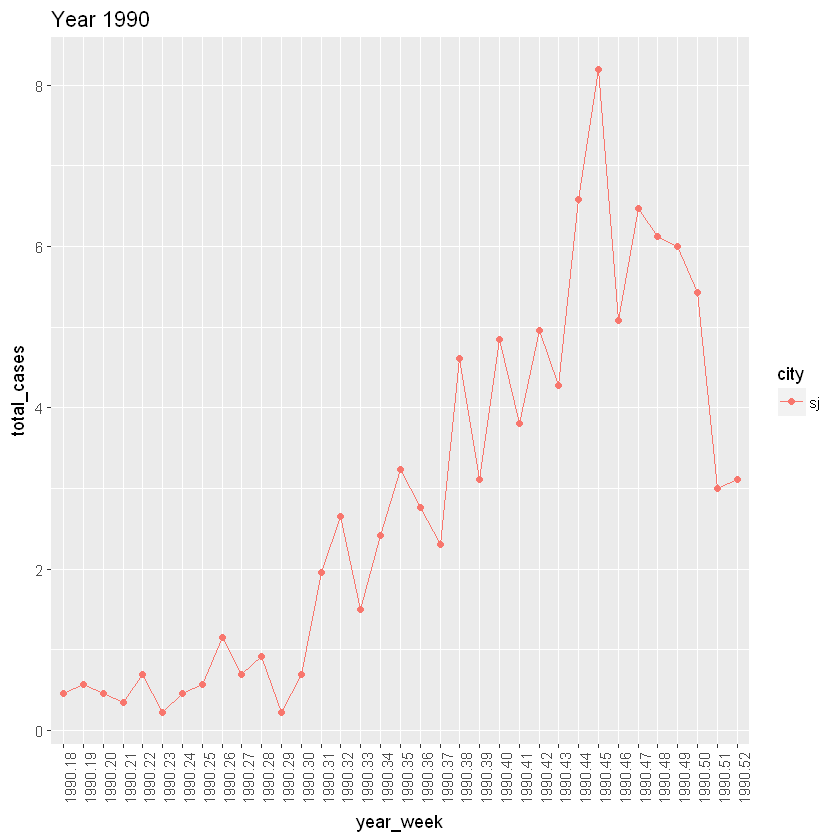

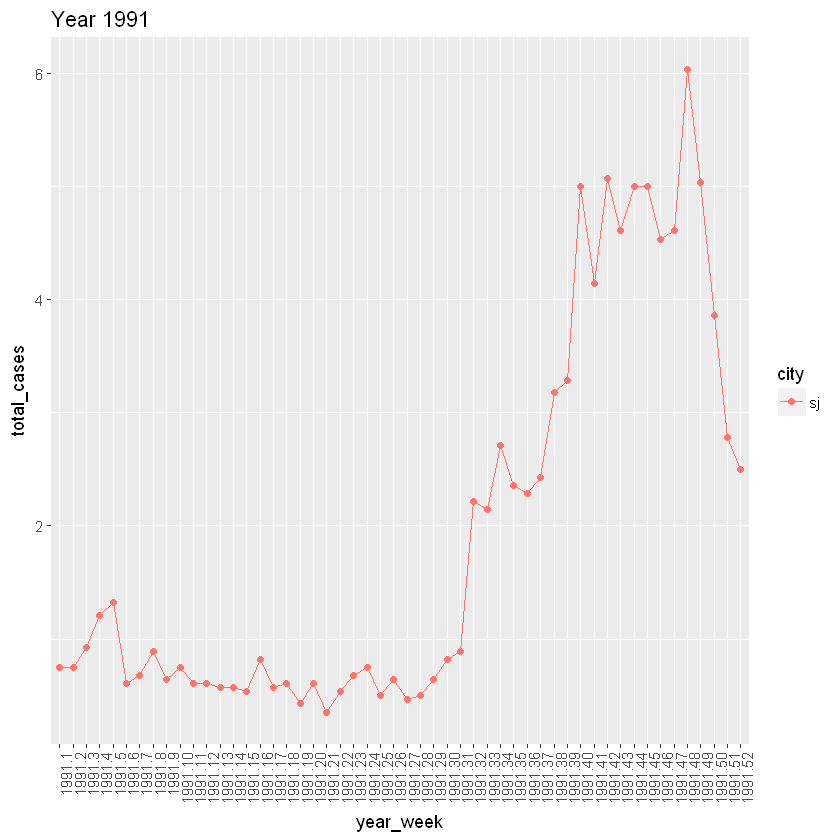

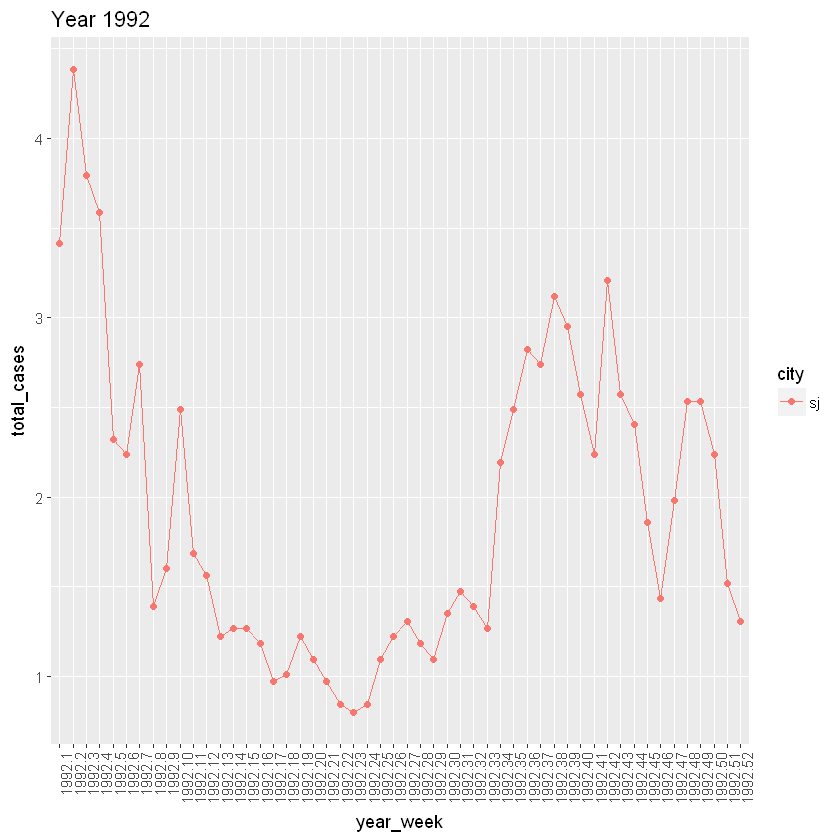

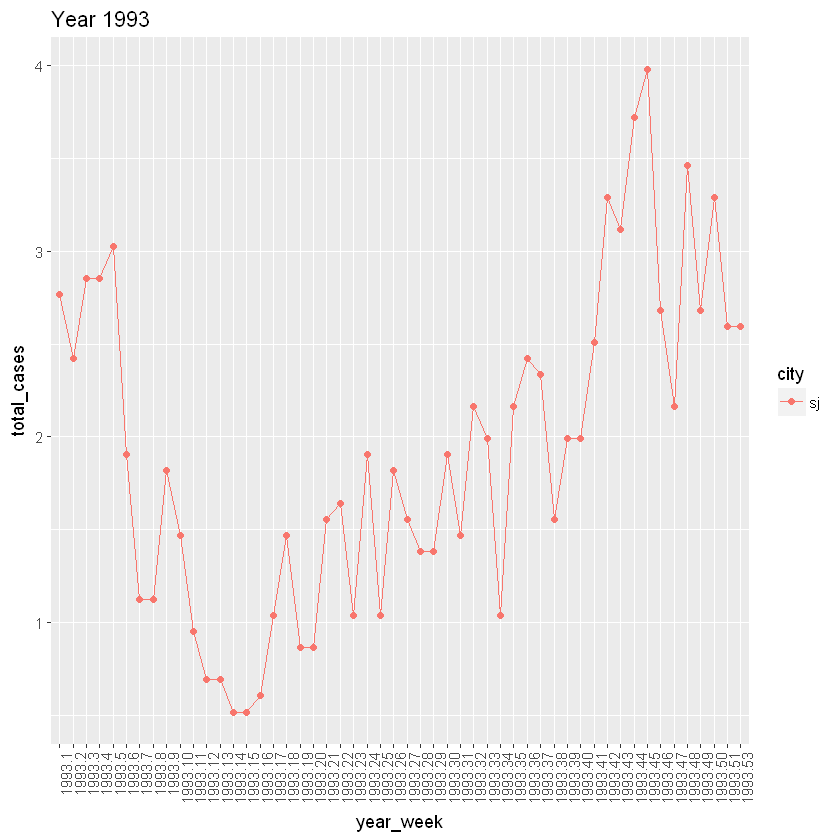

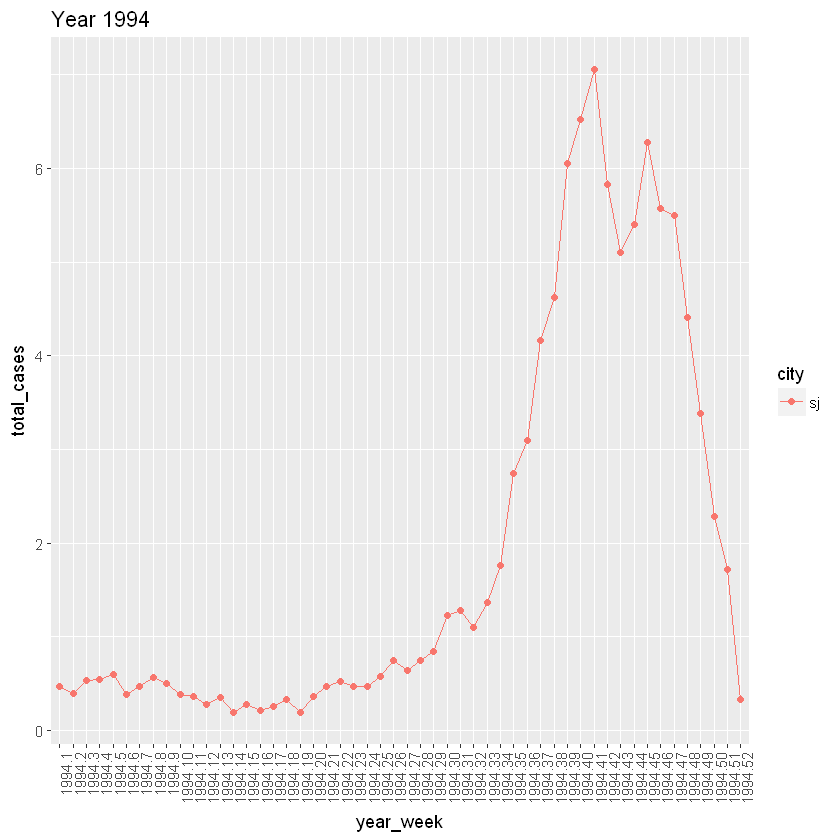

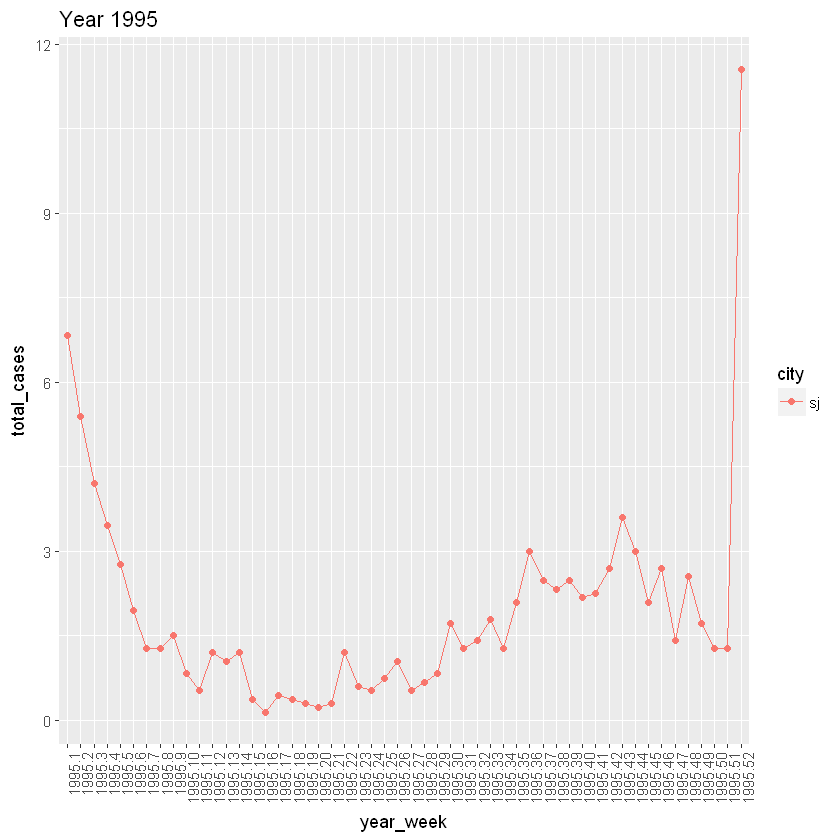

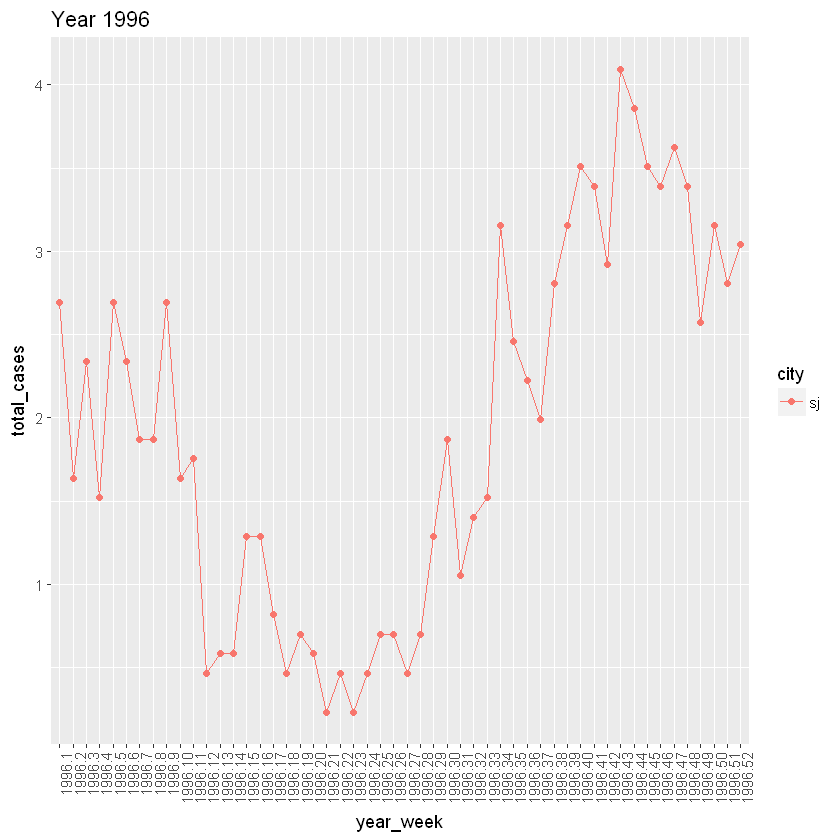

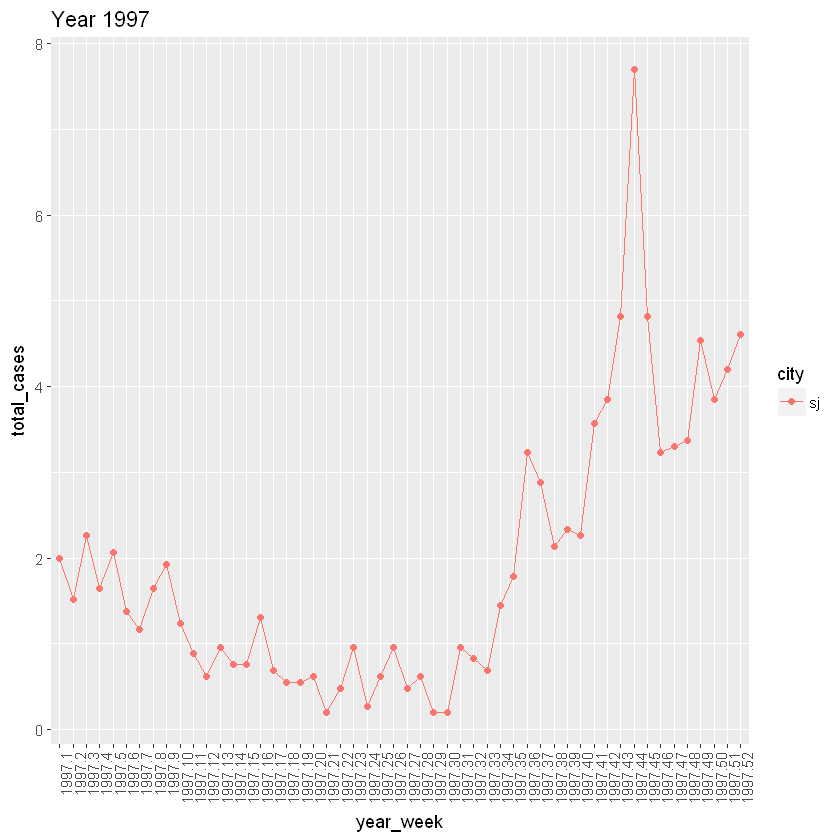

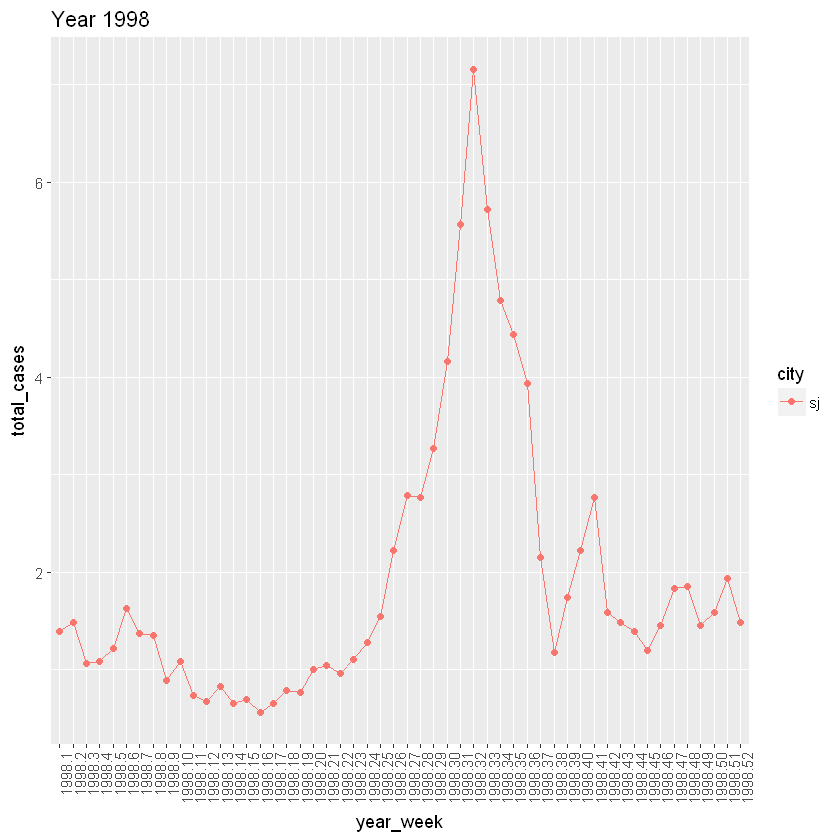

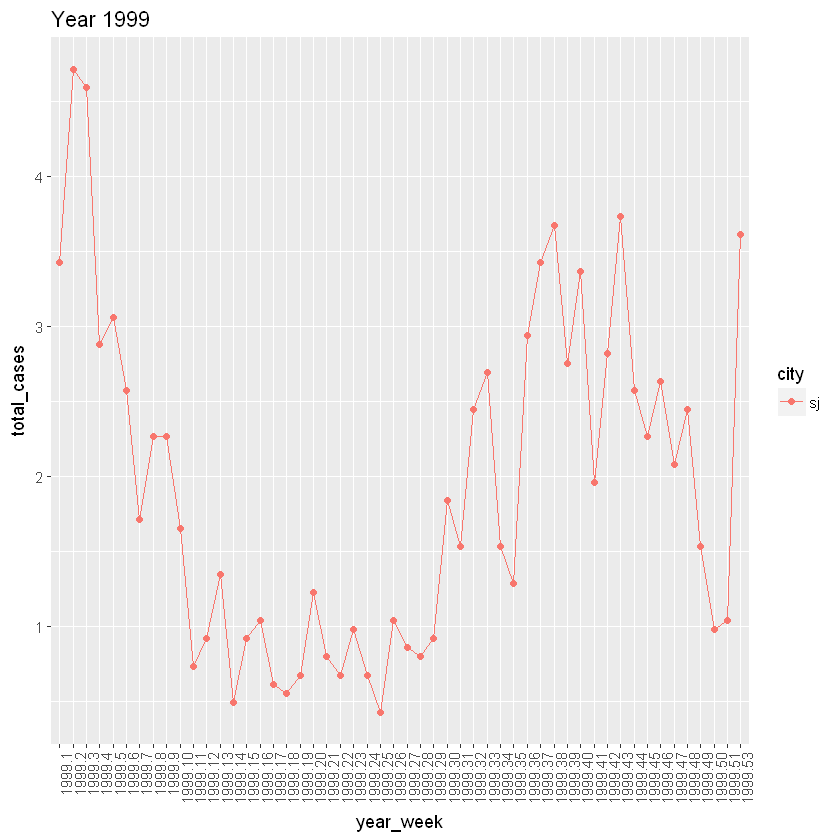

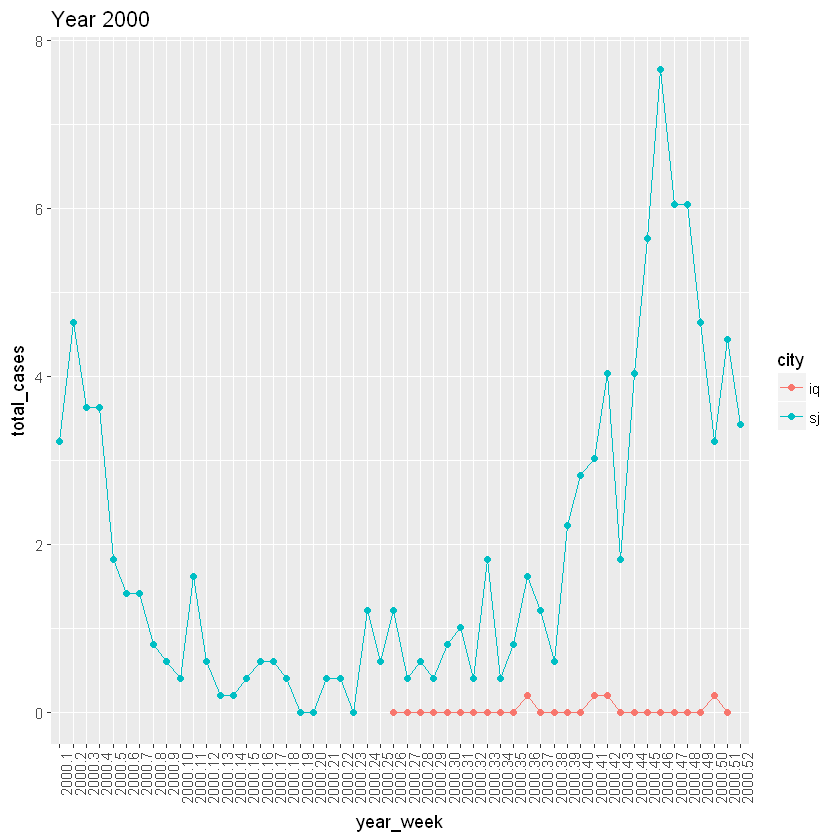

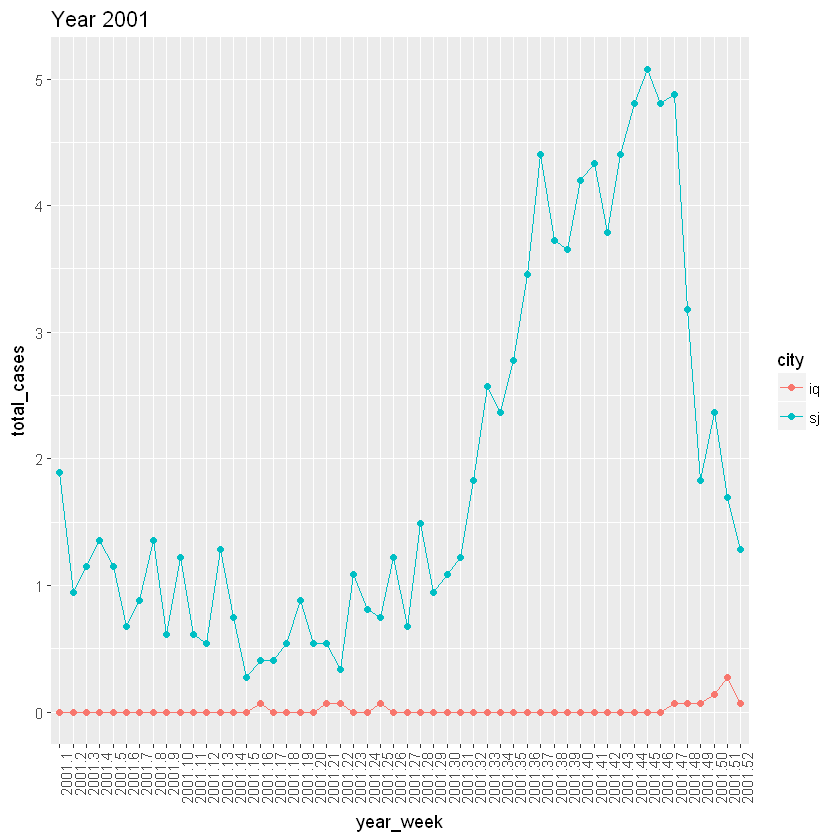

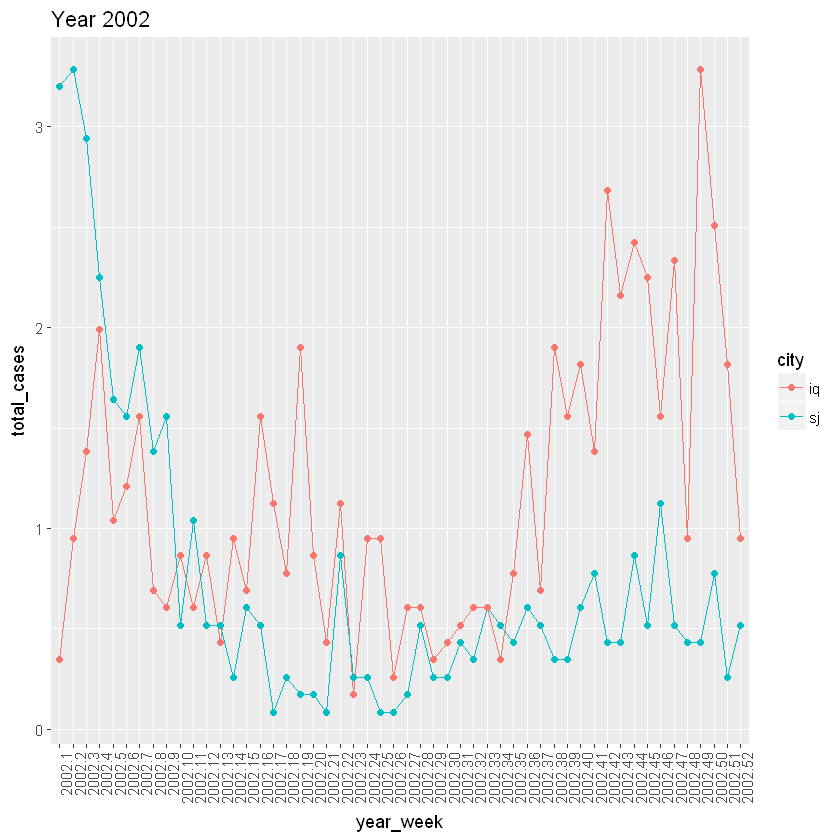

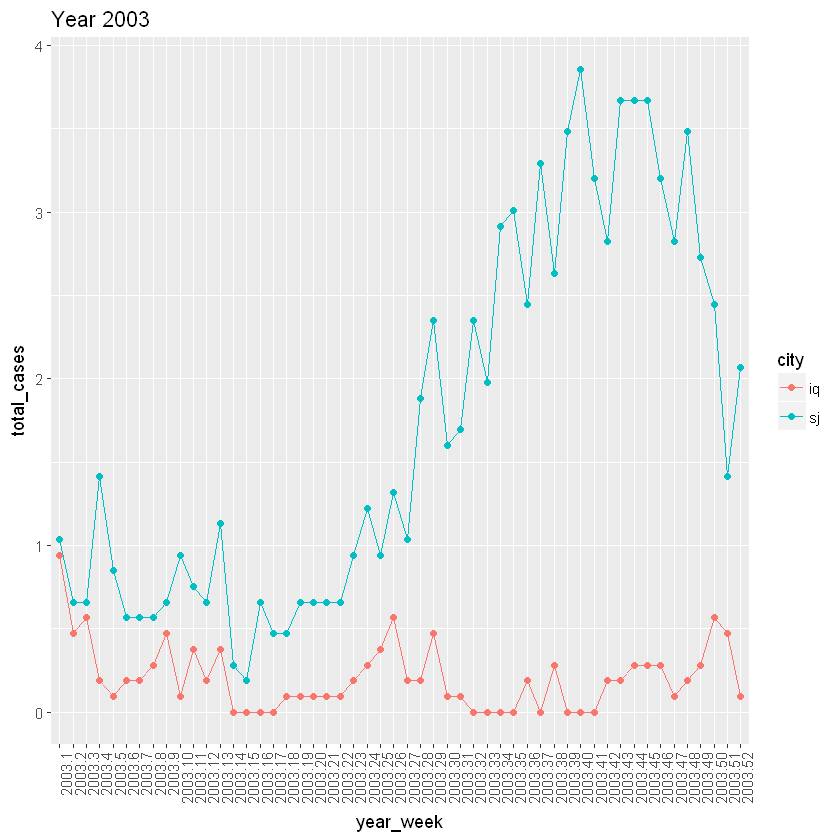

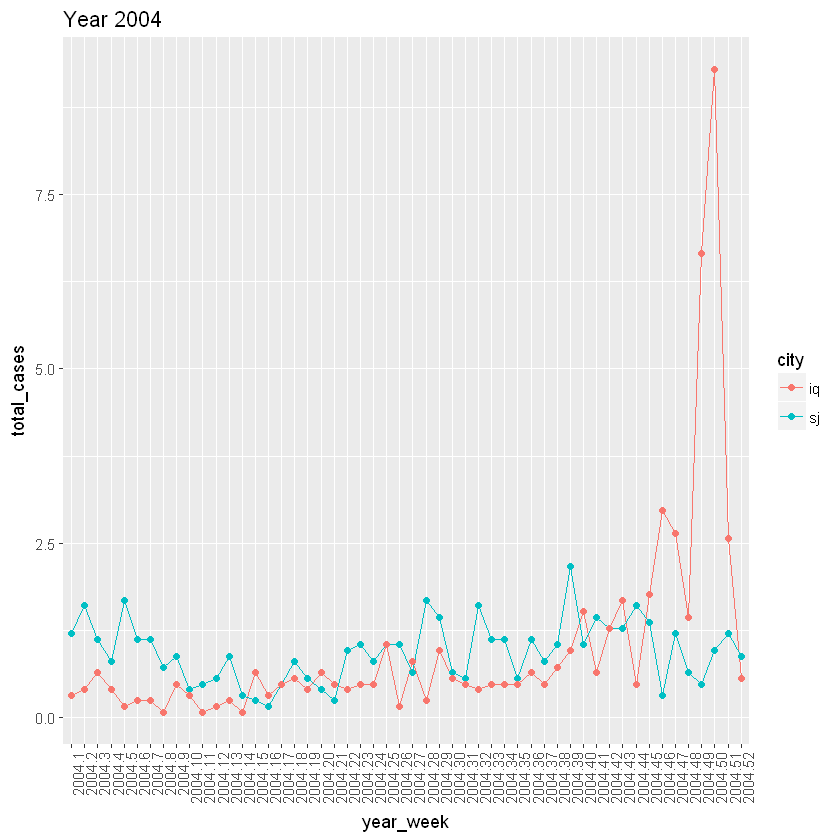

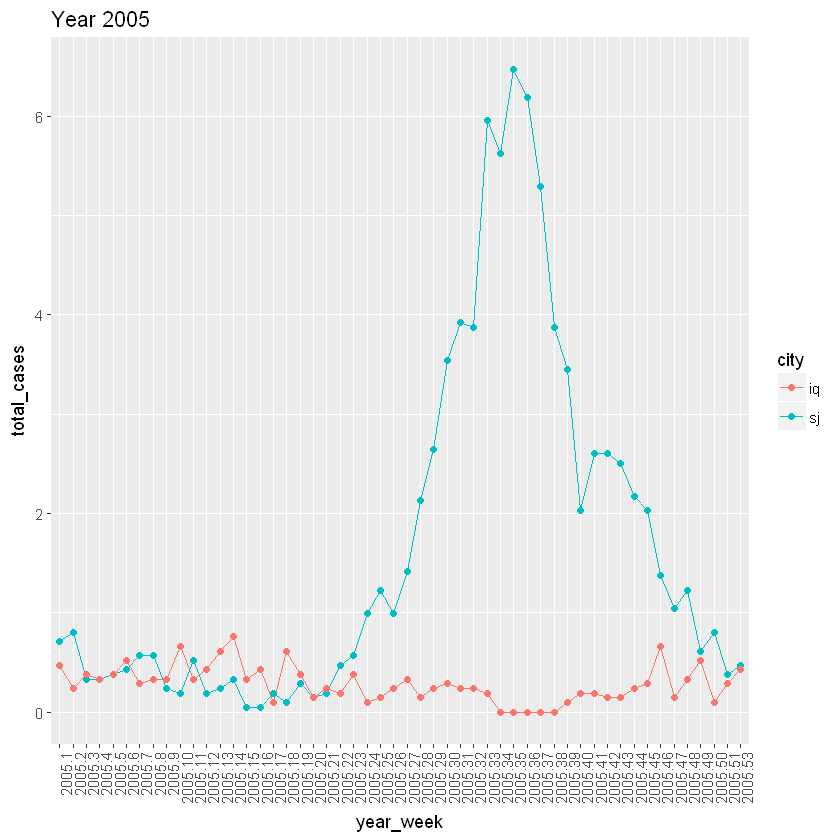

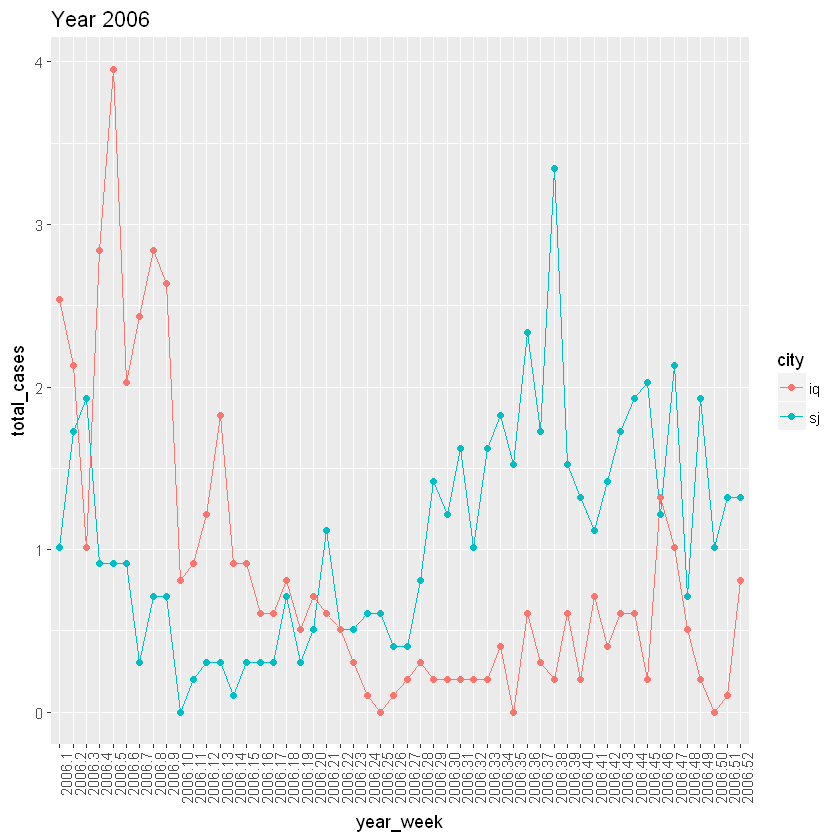

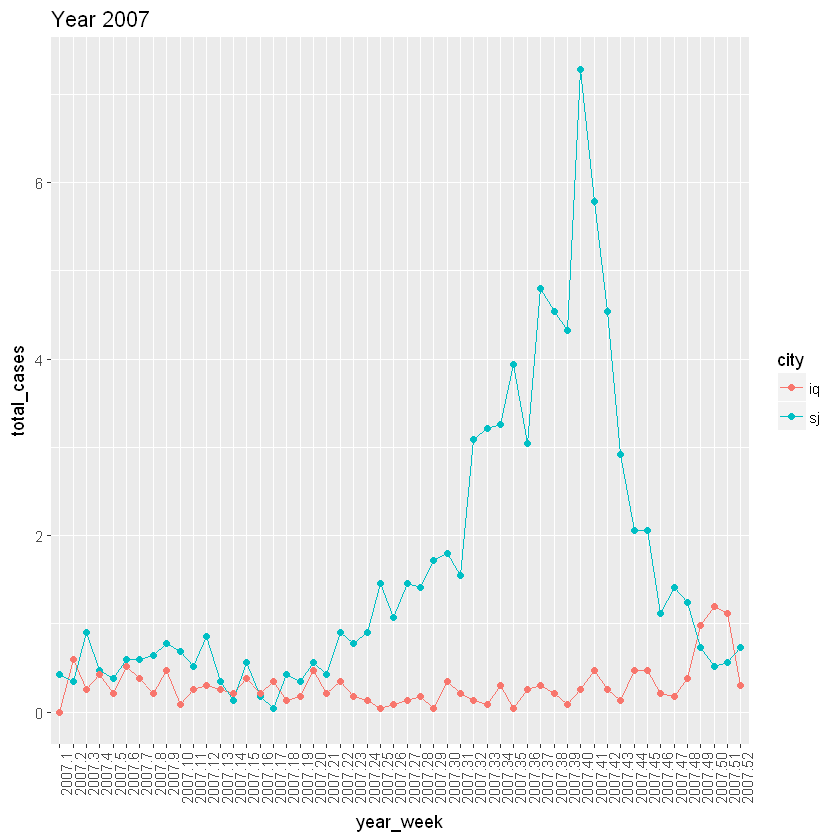

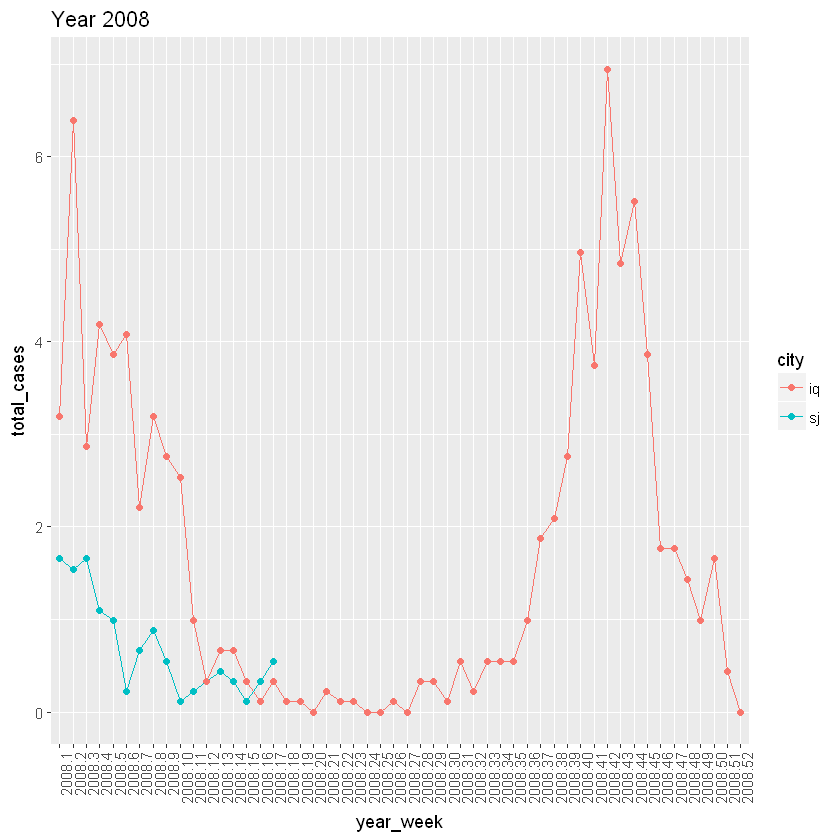

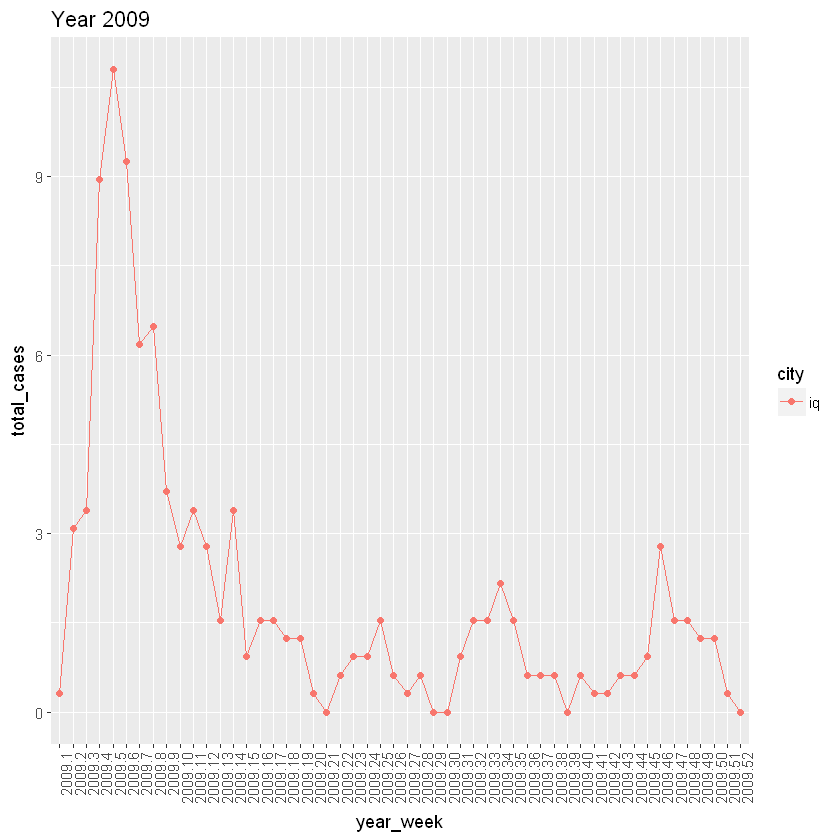

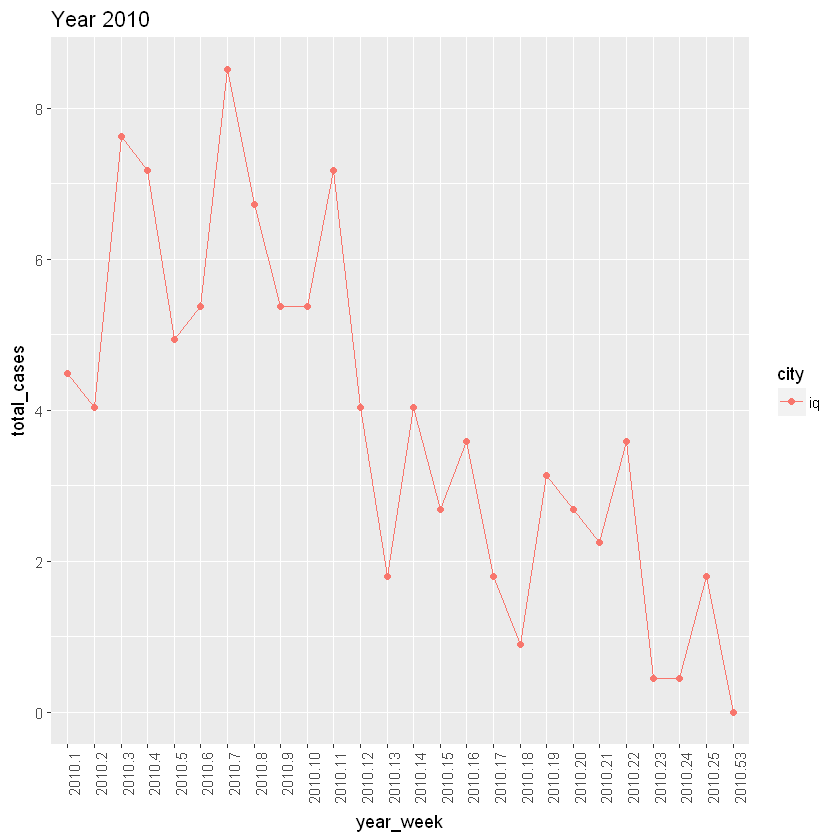

In [20]:
## count of cases every year
for(year_num in years){
    year_data <- train_label[ order(train$year,train_label$weekofyear)  & train_label$year == year_num,]
    p <- ggplot(data =year_data,aes(x = interaction(year, weekofyear, lex.order = TRUE),y = (total_cases/sum(total_cases))*100,group= city)) 
    p <- p + geom_line(aes(color=city)) + geom_point(aes(color=city)) + xlab("year_week") + theme(axis.text.x = element_text(angle = 90, hjust = 1))
    p <- p + ggtitle(paste("Year",year_num)) + ylab("total_cases")
    plot(p)
}


## Missing values analysis and treatment

In [21]:
# percentage missing values in a variable
apply(train,MARGIN = 2,function(x) round(sum(is.na(x))/length(x),4) *100)

city                                  year 
                                 0.00                                  0.00 
                           weekofyear                       week_start_date 
                                 0.00                                  0.00 
                              ndvi_ne                               ndvi_nw 
                                13.32                                  3.57 
                              ndvi_se                               ndvi_sw 
                                 1.51                                  1.51 
                 precipitation_amt_mm                 reanalysis_air_temp_k 
                                 0.89                                  0.69 
                reanalysis_avg_temp_k           reanalysis_dew_point_temp_k 
                                 0.69                                  0.69 
            reanalysis_max_air_temp_k             reanalysis_min_air_temp_k 
                                 0.69                                  0.69 
      reanalysis_precip_amt_kg_per_m2  reanalysis_relative_humidity_percent 
                                 0.69                                  0.69 
         reanalysis_sat_precip_amt_mm reanalysis_specific_humidity_g_per_kg 
                                 0.89                                  0.69 
                    reanalysis_tdtr_k                    station_avg_temp_c 
                                 0.69                                  2.95 
              station_diur_temp_rng_c                    station_max_temp_c 
                                 2.95                                  1.37 
                   station_min_temp_c                     station_precip_mm 
                                 0.96                                  1.51 
                            year_week 
                                 0.00

 We observe that in _ ndvi\\_\\ne_ varaible has 13% values missing

In [22]:
# aggregate(ndvi_ne ~ year + city, data=train, function(x) {sum(is.na(x))}, na.action = NULL)

Warning message:
"Removed 6 rows containing missing values (geom_point)."Warning message:
"Removed 10 rows containing missing values (geom_point)."

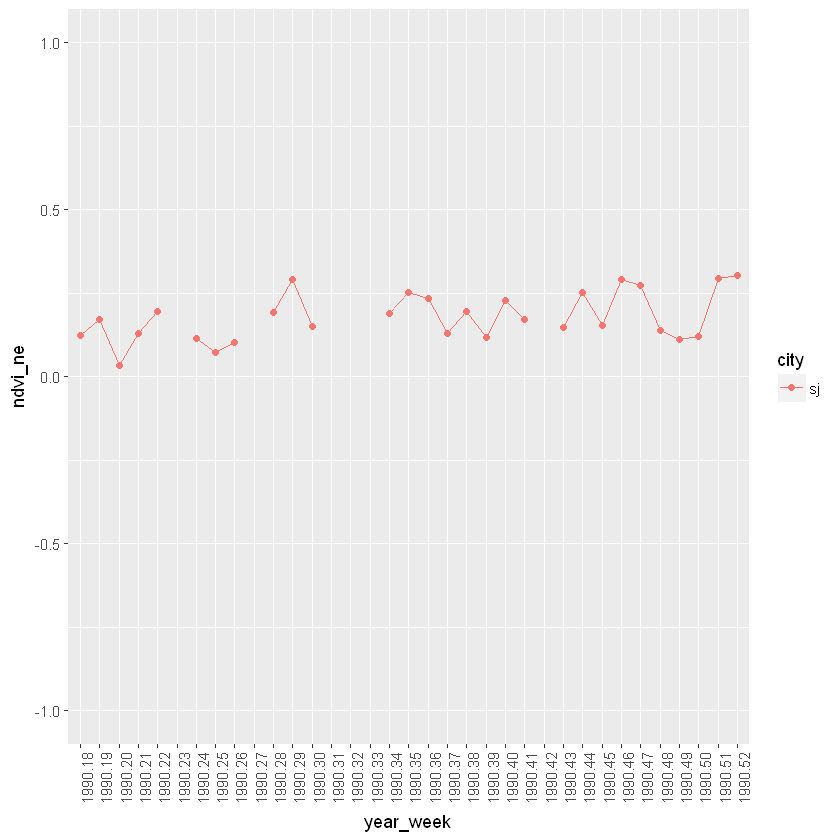

Warning message:
"Removed 8 rows containing missing values (geom_point)."

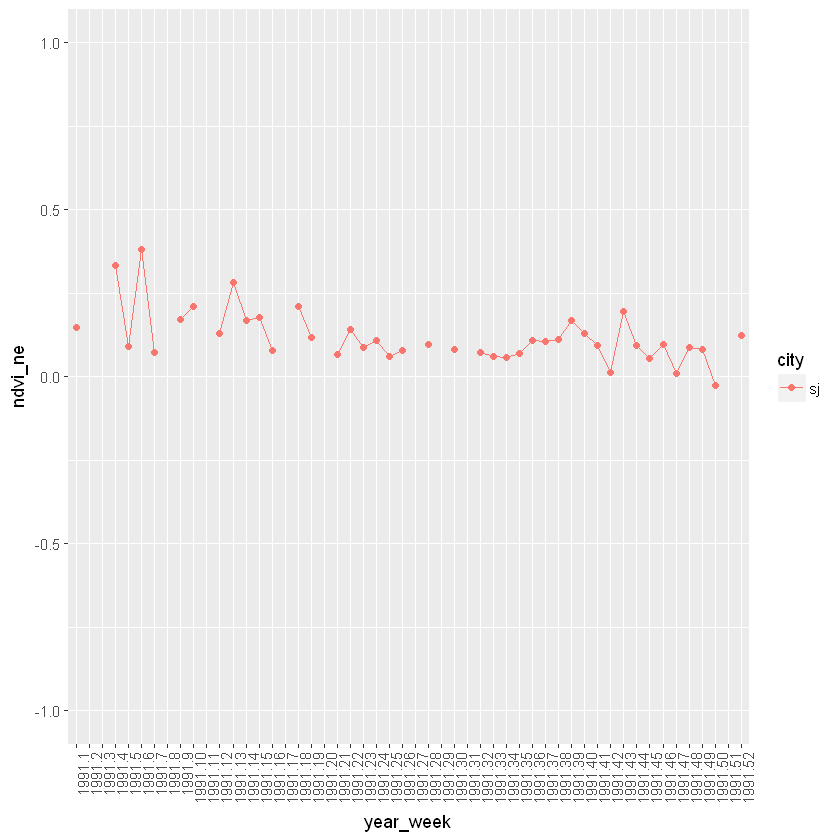

Warning message:
"Removed 1 rows containing missing values (geom_path)."Warning message:
"Removed 9 rows containing missing values (geom_point)."

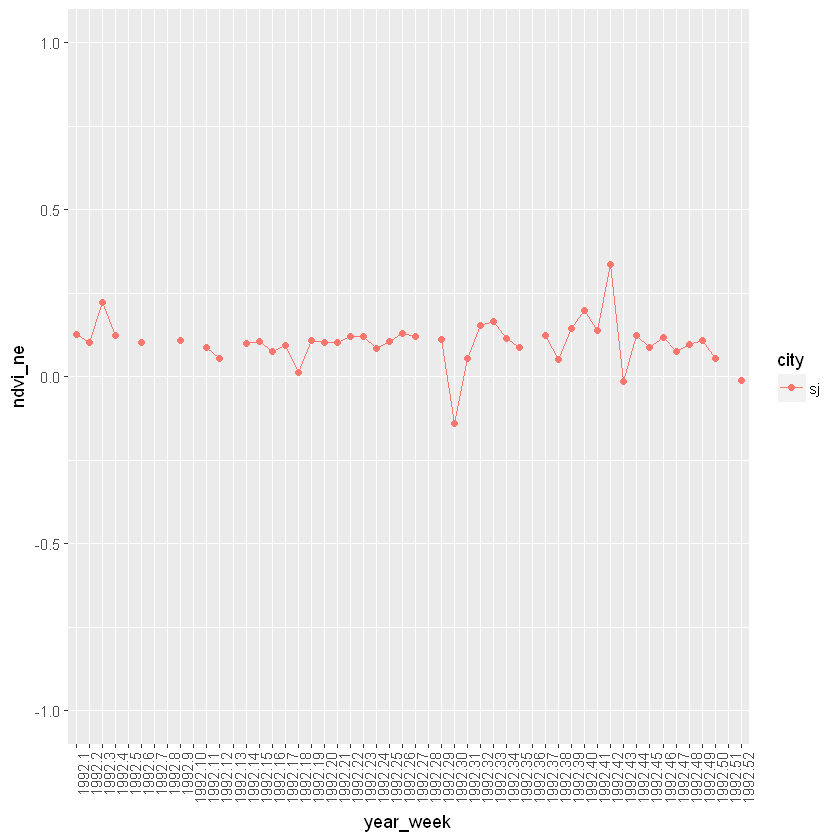

Warning message:
"Removed 16 rows containing missing values (geom_path)."Warning message:
"Removed 20 rows containing missing values (geom_point)."

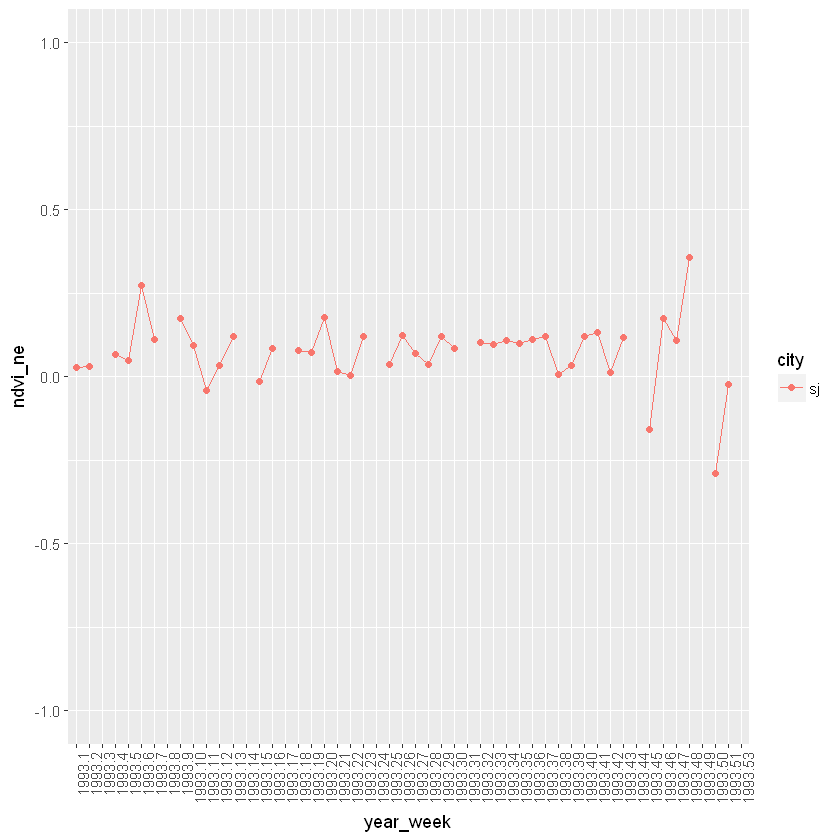

Warning message:
"Removed 11 rows containing missing values (geom_point)."

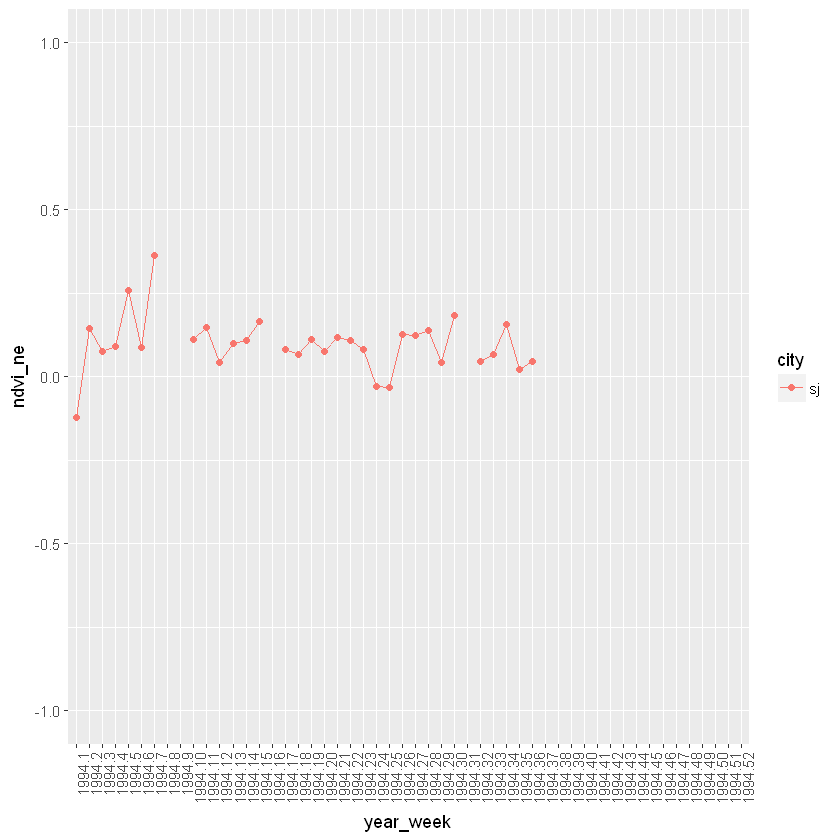

Warning message:
"Removed 14 rows containing missing values (geom_point)."

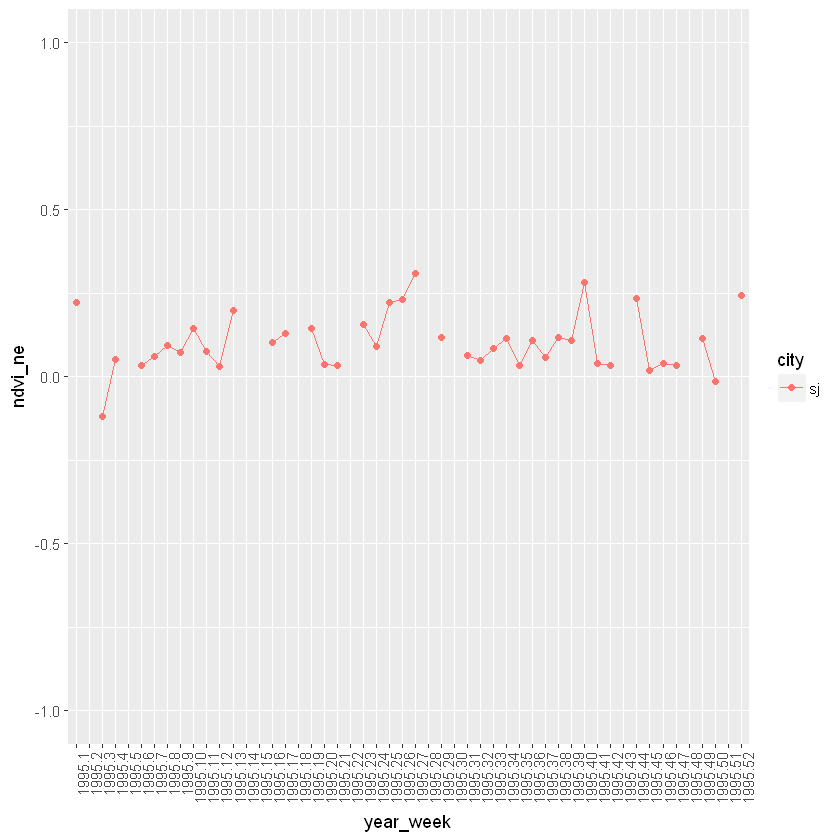

Warning message:
"Removed 11 rows containing missing values (geom_point)."

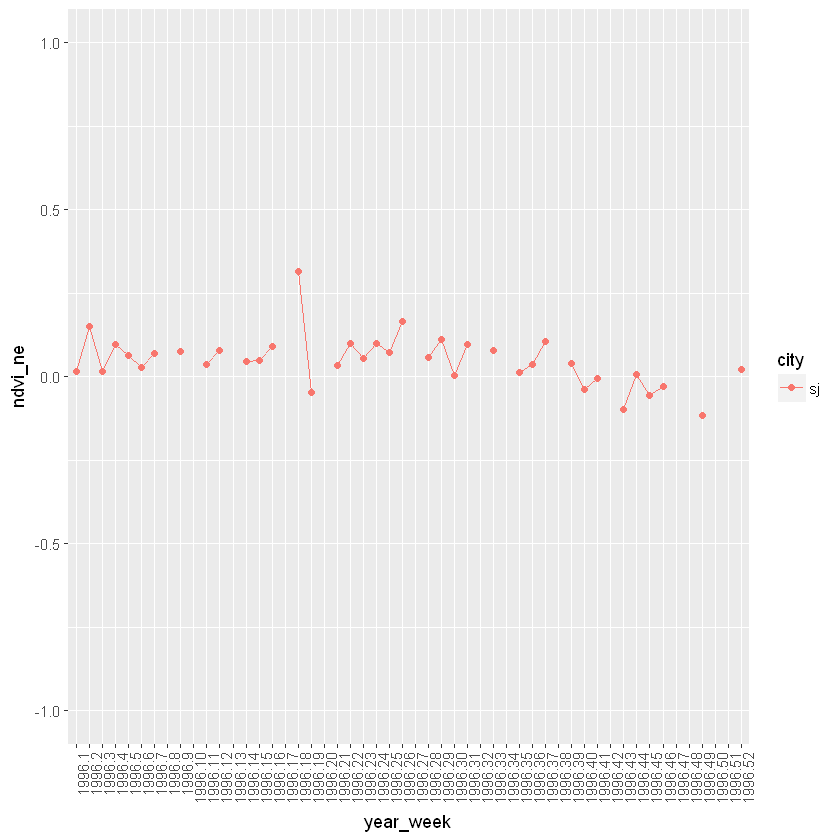

Warning message:
"Removed 10 rows containing missing values (geom_point)."

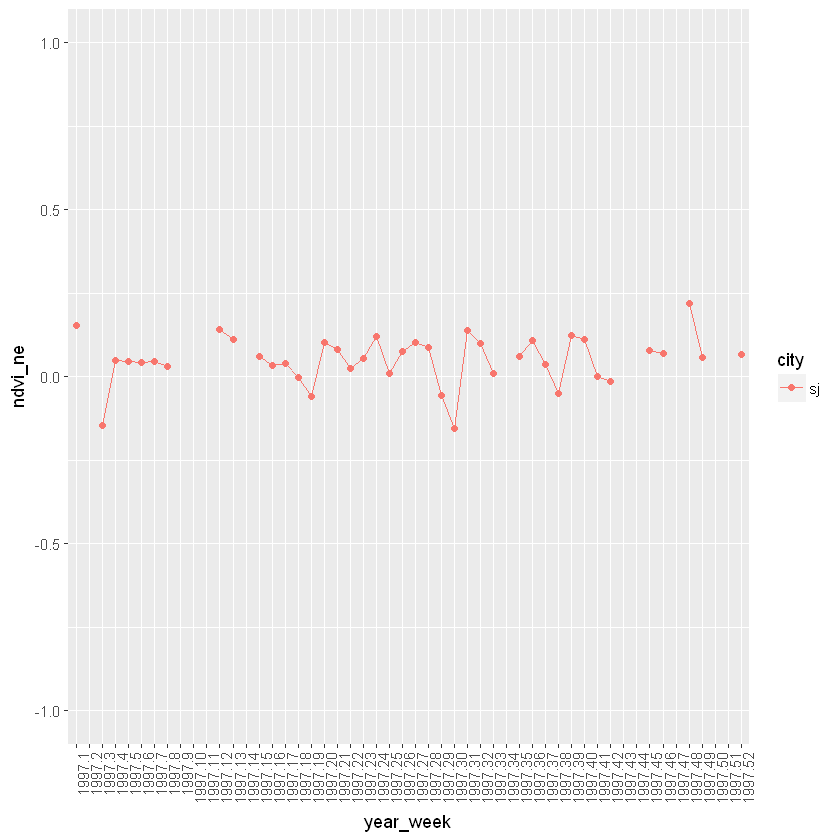

Warning message:
"Removed 2 rows containing missing values (geom_path)."Warning message:
"Removed 15 rows containing missing values (geom_point)."

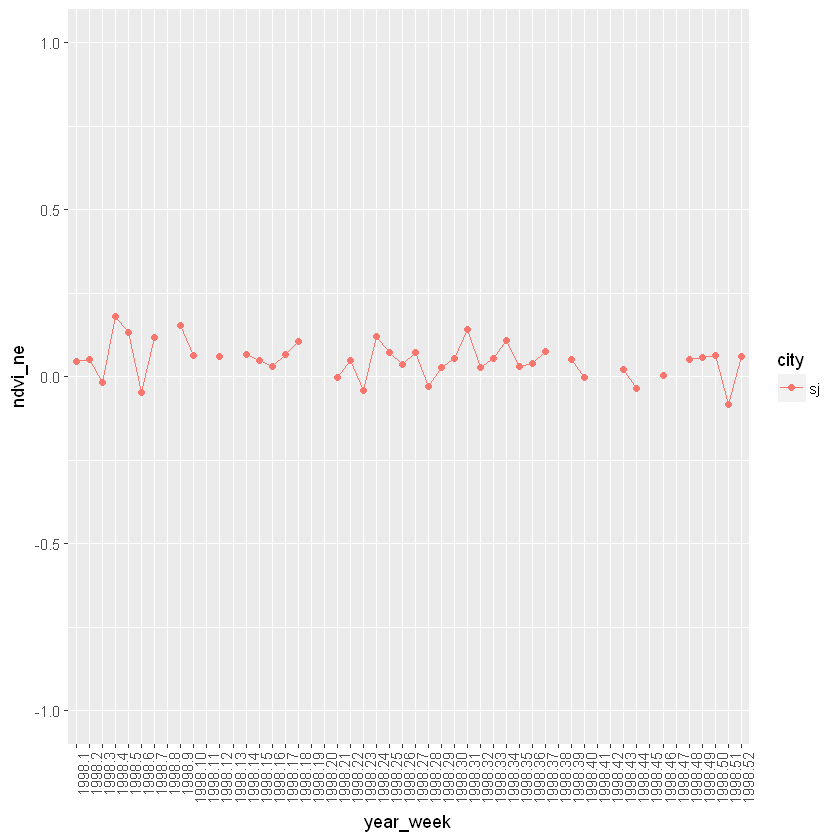

Warning message:
"Removed 7 rows containing missing values (geom_point)."

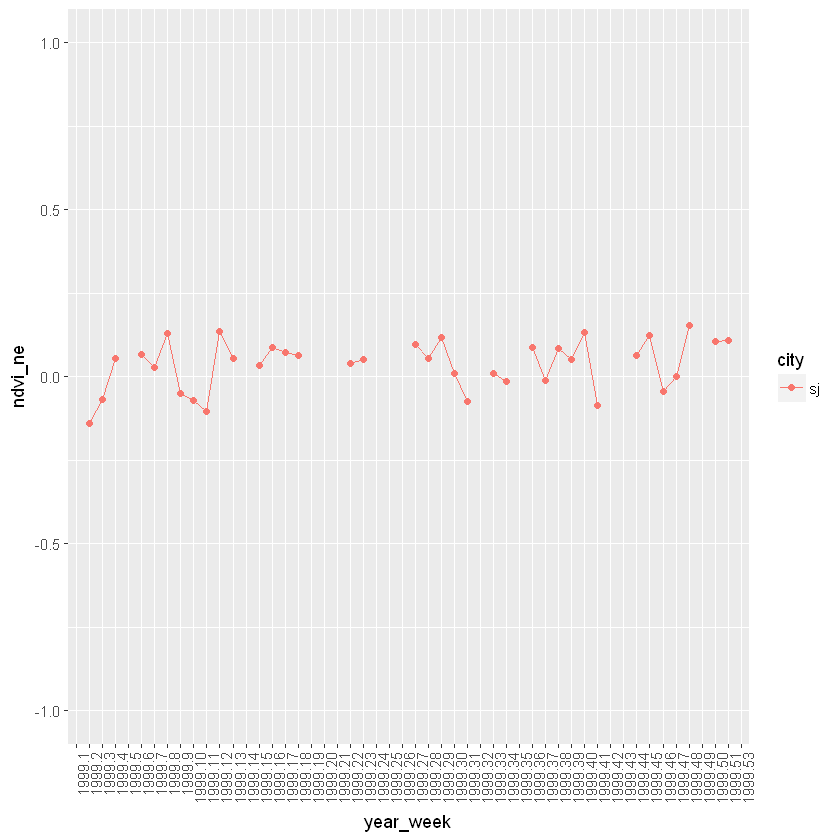

Warning message:
"Removed 9 rows containing missing values (geom_point)."

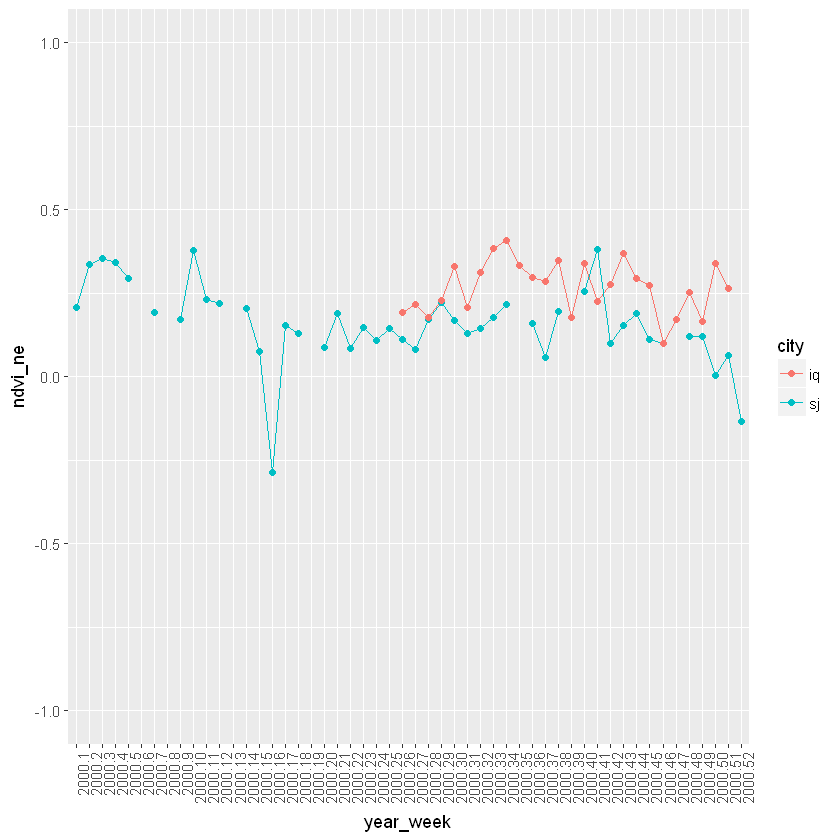

Warning message:
"Removed 10 rows containing missing values (geom_point)."

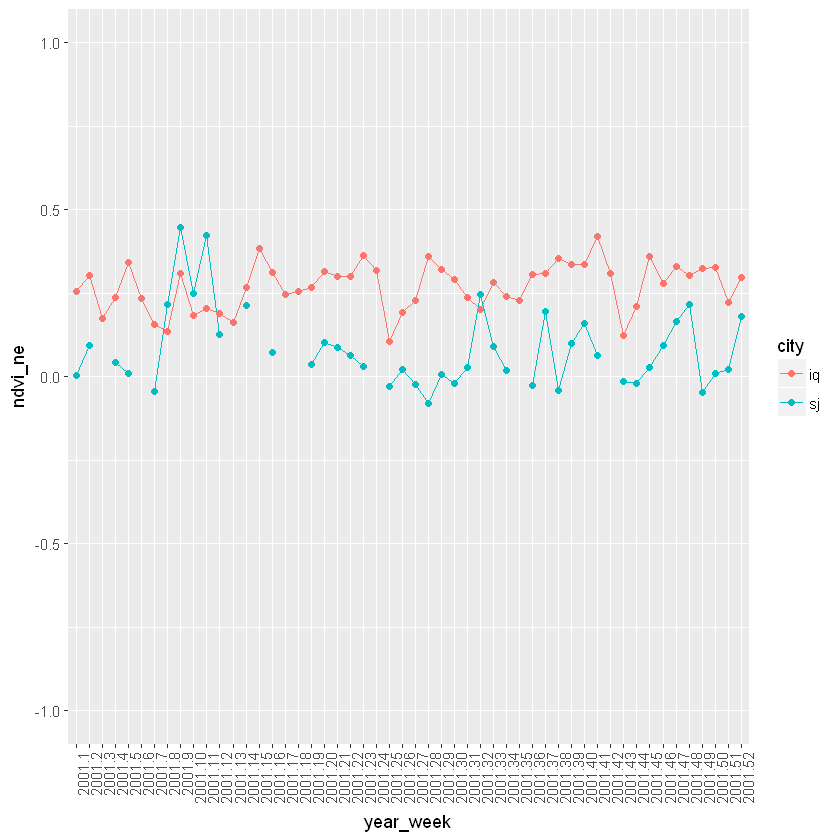

Warning message:
"Removed 9 rows containing missing values (geom_point)."

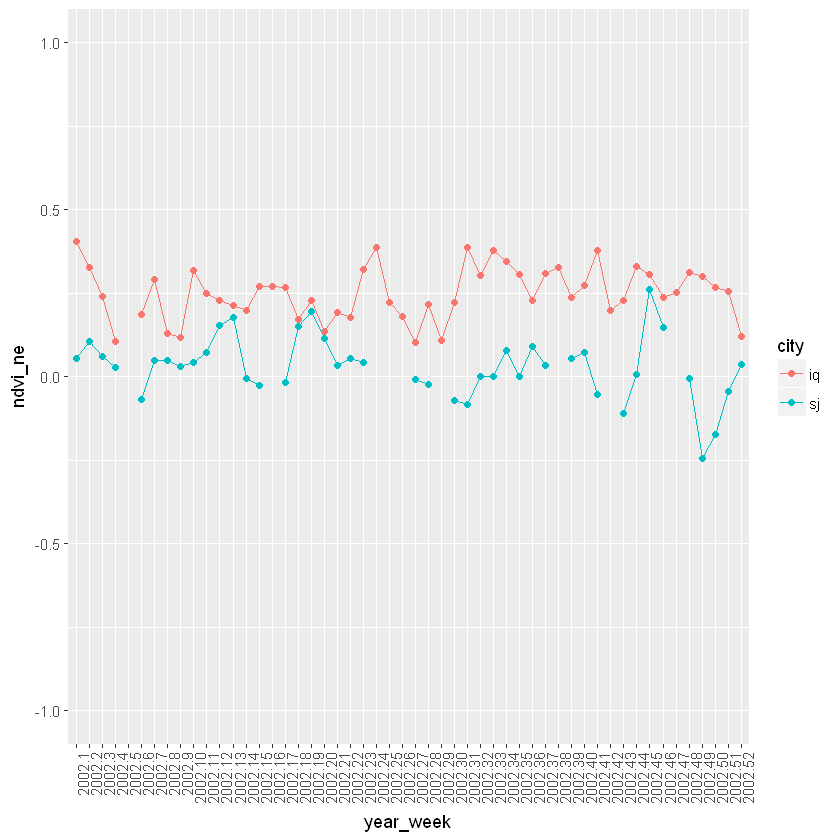

Warning message:
"Removed 10 rows containing missing values (geom_point)."

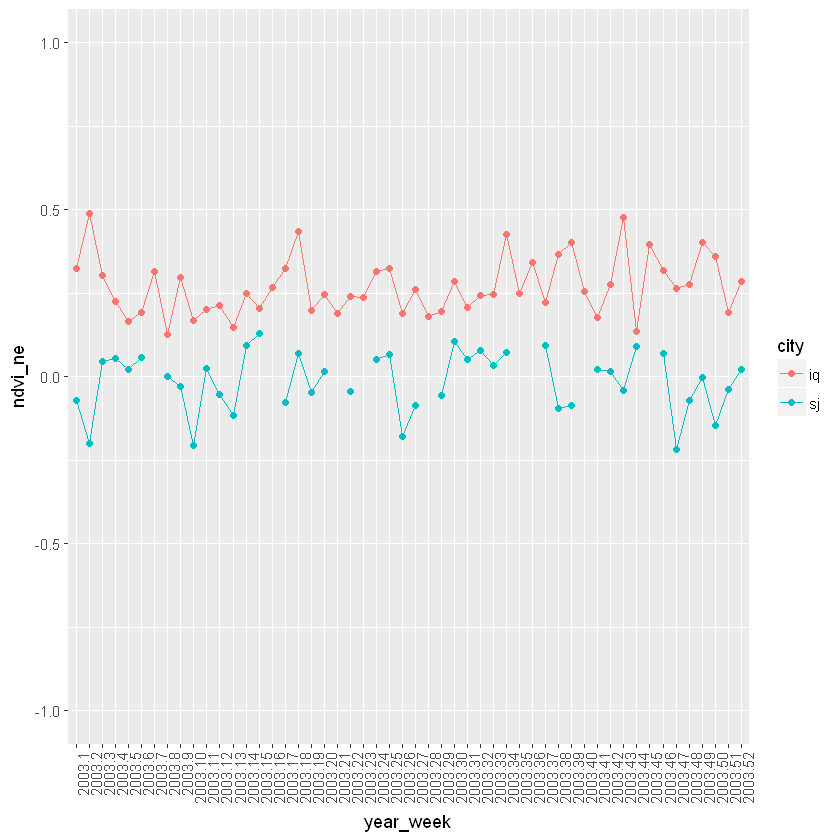

Warning message:
"Removed 2 rows containing missing values (geom_path)."Warning message:
"Removed 11 rows containing missing values (geom_point)."

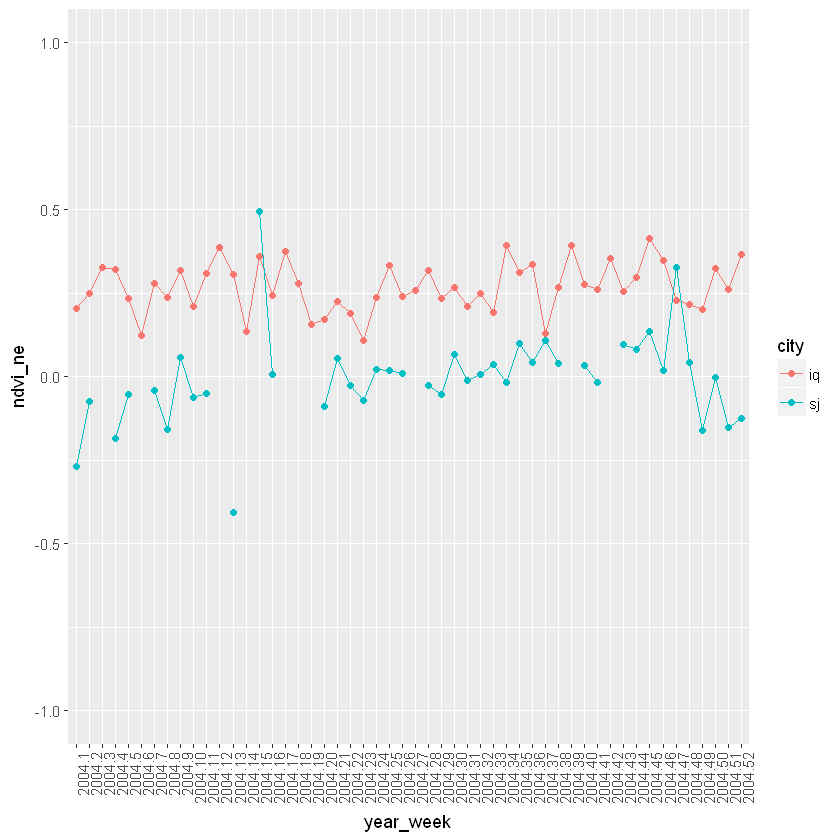

Warning message:
"Removed 7 rows containing missing values (geom_point)."

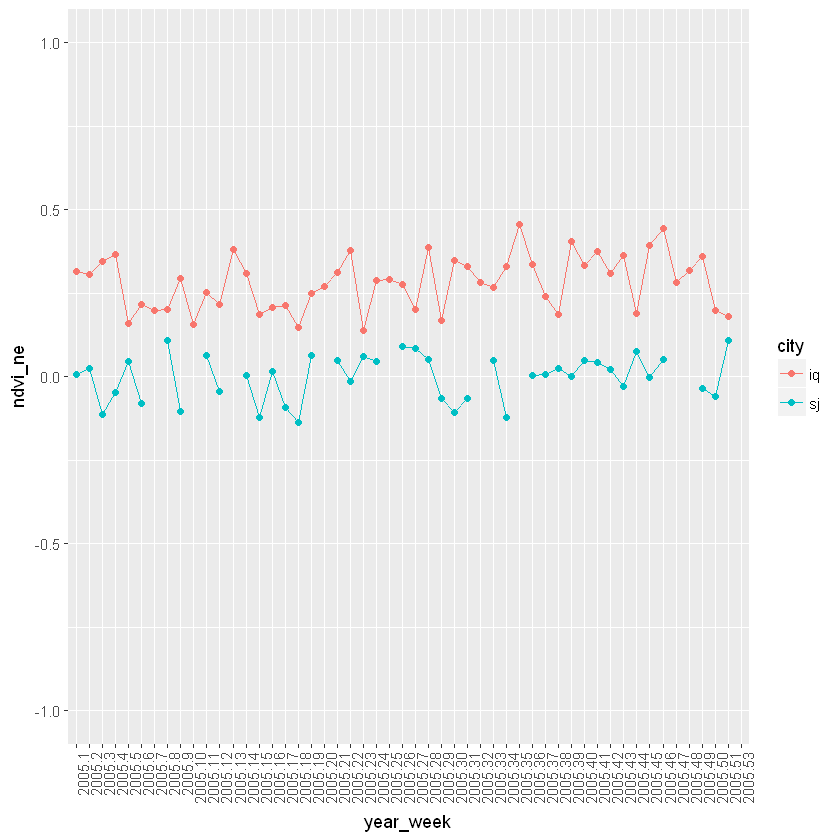

Warning message:
"Removed 12 rows containing missing values (geom_point)."

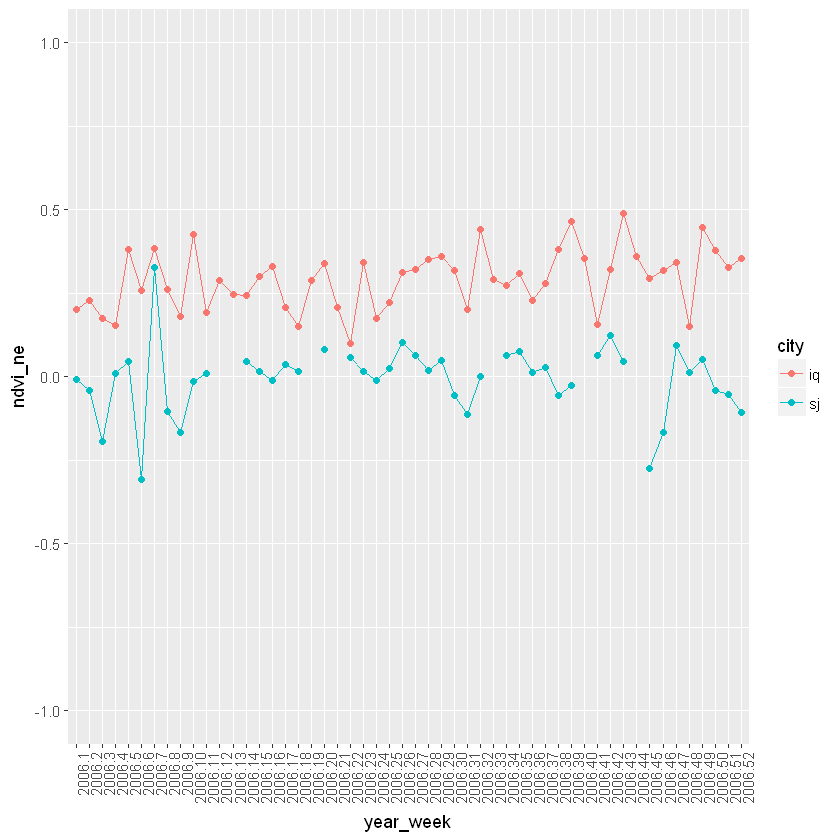

Warning message:
"Removed 4 rows containing missing values (geom_point)."

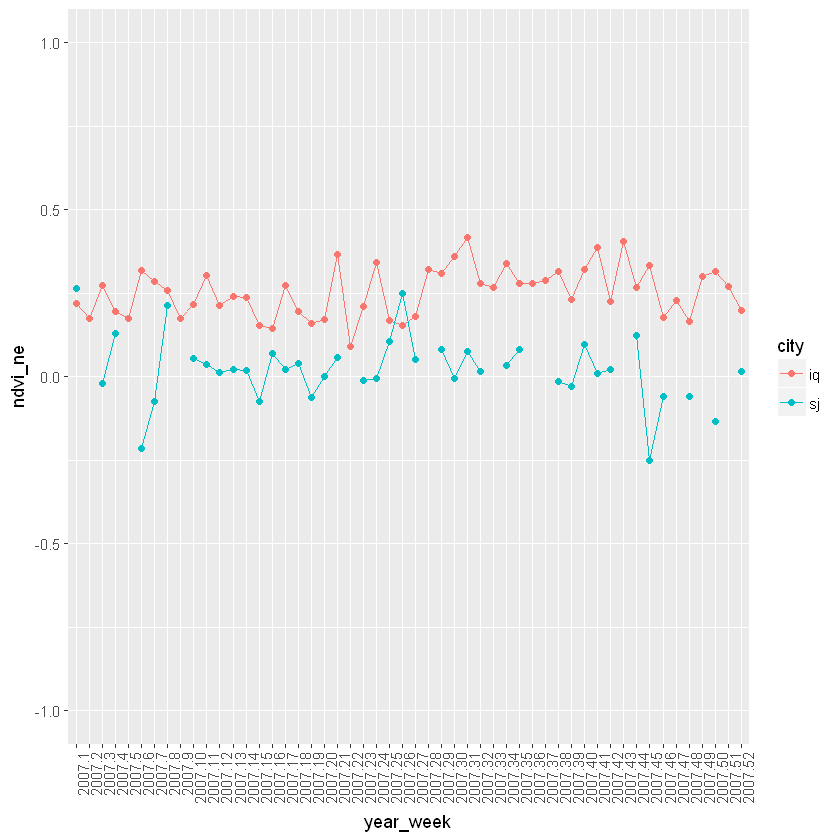

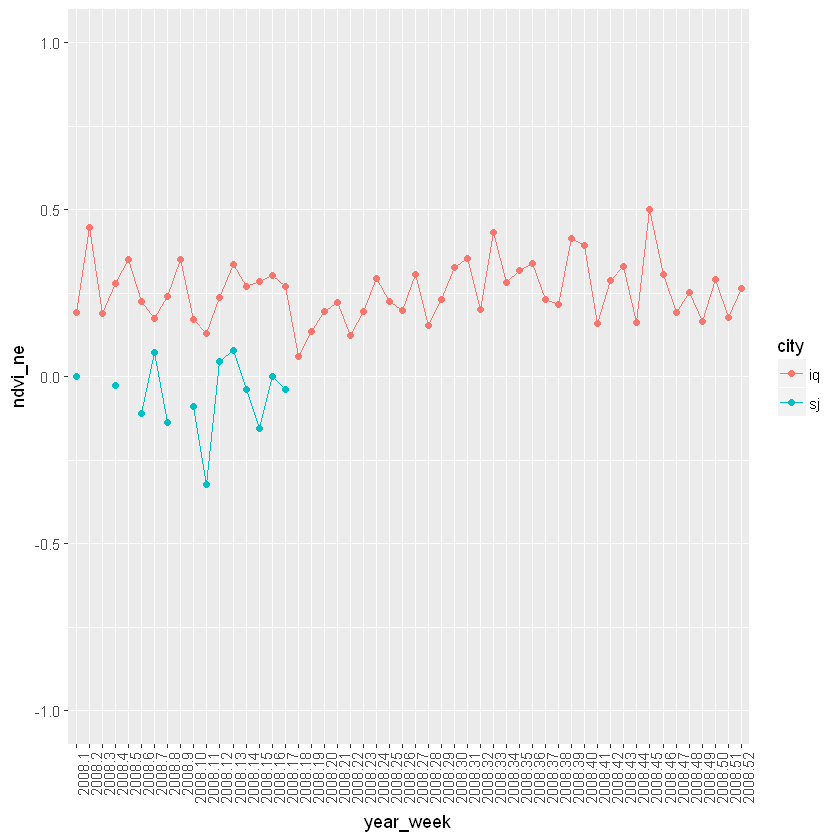

Warning message:
"Removed 1 rows containing missing values (geom_path)."Warning message:
"Removed 1 rows containing missing values (geom_point)."

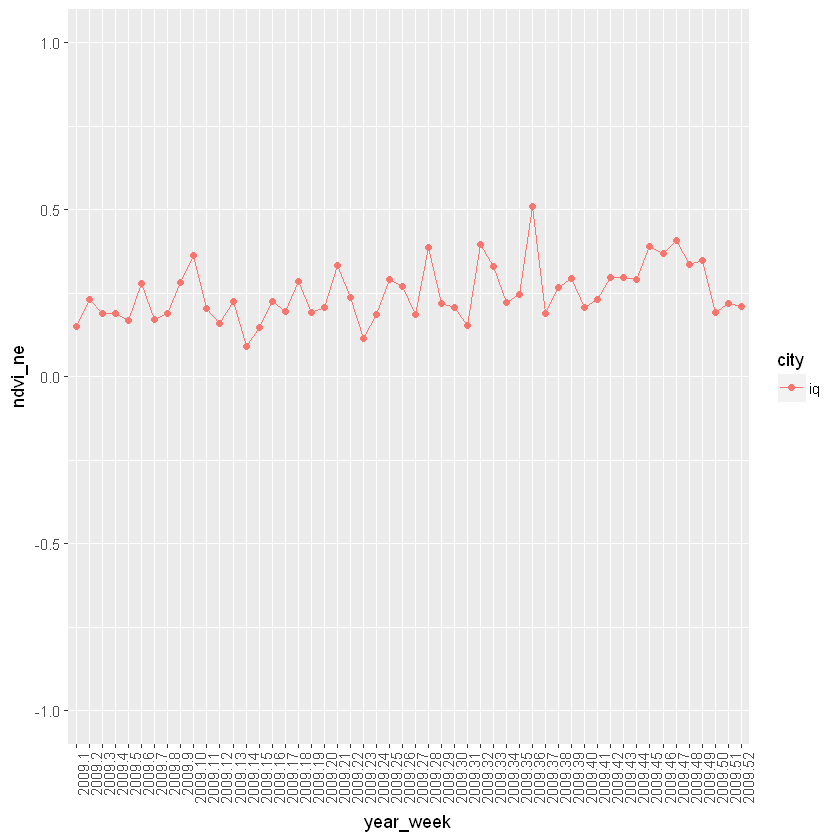

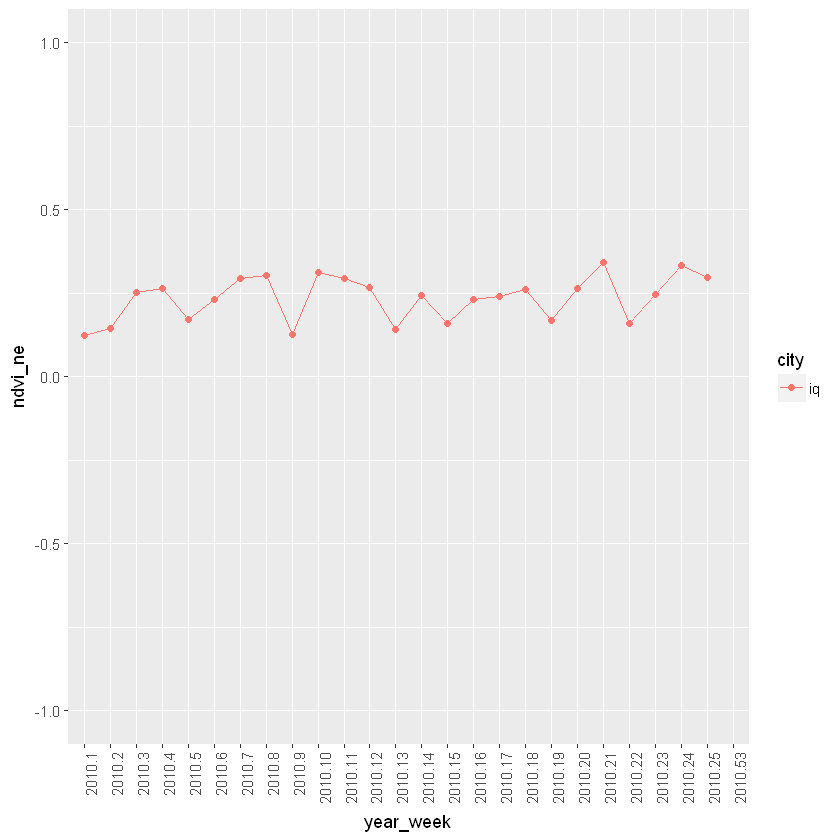

In [23]:
for(year_num in years){
    year_data <- train[ order(train$year,train$weekofyear)  & train$year == year_num,]
    p <- ggplot(data= year_data,aes(x = interaction(year, weekofyear, lex.order = TRUE),y = ndvi_ne,group= city)) 
    p <- p + geom_line(aes(color=city)) +  geom_point(aes(color=city))+ ylim(-1,1 ) +theme(axis.text.x = element_text(angle = 90, hjust = 1)) + xlab("year_week")
    plot(p)
    print
}


In [24]:
for (my_city in c("sj","iq")){
        print(my_city)
    for (year_num in years){
        print(my_city)
        print(year_num)
        print(sum(is.na(train$ndvi_ne[train$year ==year_num & train$city == my_city])))
        train$ndvi_ne[train$year ==year_num & train$city == my_city] <- na.approx(train$ndvi_ne[train$year == year_num & train$city == my_city])
    }
}

[1] "sj"
[1] "sj"
[1] 1990
[1] 6
[1] "sj"
[1] 1991
[1] 10
[1] "sj"
[1] 1992
[1] 8
[1] "sj"
[1] 1993
[1] 9


Warning message in train$ndvi_ne[train$year == year_num & train$city == my_city] <- na.approx(train$ndvi_ne[train$year == :
"number of items to replace is not a multiple of replacement length"

[1] "sj"
[1] 1994
[1] 20


Warning message in train$ndvi_ne[train$year == year_num & train$city == my_city] <- na.approx(train$ndvi_ne[train$year == :
"number of items to replace is not a multiple of replacement length"

[1] "sj"
[1] 1995
[1] 11
[1] "sj"
[1] 1996
[1] 14
[1] "sj"
[1] 1997
[1] 11
[1] "sj"
[1] 1998
[1] 10
[1] "sj"
[1] 1999
[1] 15


Warning message in train$ndvi_ne[train$year == year_num & train$city == my_city] <- na.approx(train$ndvi_ne[train$year == :
"number of items to replace is not a multiple of replacement length"

[1] "sj"
[1] 2000
[1] 7
[1] "sj"
[1] 2001
[1] 9
[1] "sj"
[1] 2002
[1] 9
[1] "sj"
[1] 2003
[1] 9
[1] "sj"
[1] 2004
[1] 10
[1] "sj"
[1] 2005
[1] 10


Warning message in train$ndvi_ne[train$year == year_num & train$city == my_city] <- na.approx(train$ndvi_ne[train$year == :
"number of items to replace is not a multiple of replacement length"

[1] "sj"
[1] 2006
[1] 7
[1] "sj"
[1] 2007
[1] 12
[1] "sj"
[1] 2008
[1] 4
[1] "sj"
[1] 2009
[1] 0
[1] "sj"
[1] 2010
[1] 0
[1] "iq"
[1] "iq"
[1] 1990
[1] 0
[1] "iq"
[1] 1991
[1] 0
[1] "iq"
[1] 1992
[1] 0
[1] "iq"
[1] 1993
[1] 0
[1] "iq"
[1] 1994
[1] 0
[1] "iq"
[1] 1995
[1] 0
[1] "iq"
[1] 1996
[1] 0
[1] "iq"
[1] 1997
[1] 0
[1] "iq"
[1] 1998
[1] 0
[1] "iq"
[1] 1999
[1] 0
[1] "iq"
[1] 2000
[1] 0
[1] "iq"
[1] 2001
[1] 0
[1] "iq"
[1] 2002
[1] 1
[1] "iq"
[1] 2003
[1] 0
[1] "iq"
[1] 2004
[1] 0
[1] "iq"
[1] 2005
[1] 1


Warning message in train$ndvi_ne[train$year == year_num & train$city == my_city] <- na.approx(train$ndvi_ne[train$year == :
"number of items to replace is not a multiple of replacement length"

[1] "iq"
[1] 2006
[1] 0
[1] "iq"
[1] 2007
[1] 0
[1] "iq"
[1] 2008
[1] 0
[1] "iq"
[1] 2009
[1] 0
[1] "iq"
[1] 2010
[1] 1


Warning message in train$ndvi_ne[train$year == year_num & train$city == my_city] <- na.approx(train$ndvi_ne[train$year == :
"number of items to replace is not a multiple of replacement length"

In [25]:
apply(train,MARGIN = 2,function(x) round(sum(is.na(x))/length(x),4) *100)

city                                  year 
                                 0.00                                  0.00 
                           weekofyear                       week_start_date 
                                 0.00                                  0.00 
                              ndvi_ne                               ndvi_nw 
                                 0.00                                  3.57 
                              ndvi_se                               ndvi_sw 
                                 1.51                                  1.51 
                 precipitation_amt_mm                 reanalysis_air_temp_k 
                                 0.89                                  0.69 
                reanalysis_avg_temp_k           reanalysis_dew_point_temp_k 
                                 0.69                                  0.69 
            reanalysis_max_air_temp_k             reanalysis_min_air_temp_k 
                                 0.69                                  0.69 
      reanalysis_precip_amt_kg_per_m2  reanalysis_relative_humidity_percent 
                                 0.69                                  0.69 
         reanalysis_sat_precip_amt_mm reanalysis_specific_humidity_g_per_kg 
                                 0.89                                  0.69 
                    reanalysis_tdtr_k                    station_avg_temp_c 
                                 0.69                                  2.95 
              station_diur_temp_rng_c                    station_max_temp_c 
                                 2.95                                  1.37 
                   station_min_temp_c                     station_precip_mm 
                                 0.96                                  1.51 
                            year_week 
                                 0.00

In [26]:
# vif(train[,5:24])